In [11]:
# diego
from geoanalysistools.geo import *
today = todayDate()
print(today)

Loading GeoAnalysisTools
6/1/2022


In [12]:
data = readconf("config.toml")

data['IGN']['endDate'] = today
data['IGN']['startDate'] = "01/01/2010"

# intMin= intMax= magMin= magMax= profMin= profMax= cond=
# https://epsg.io/map#srs=4326&x=-17.807&y=28.599&z=10&layer=streets

encoded_data = urllib.parse.urlencode( data['IGN'] , doseq=True)
url = data['default']['search_url'] + encoded_data
# %system explorer "$url"
url

dict_keys(['name', 'default', 'IGN', 'profile1', 'profile2'])


'https://www.ign.es/web/ign/portal/sis-catalogo-terremotos/-/catalogo-terremotos/searchTerremoto?latMin=26.6412193530742&latMax=30.244734978074202&longMin=-19.694437169627594&longMax=-15.212015294627593&startDate=01%2F01%2F2010&endDate=6%2F1%2F2022&selIntensidad=N&selMagnitud=N&selProf=N&fases=no'

In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

<IPython.core.display.Javascript object>

In [14]:
# Open a GeoJSON provided and use it as GeoDataFrame
filename = data['default']['global_geojson_file']
df = gpd.read_file(filename, driver="GeoJSON") # The series need minimal processing, next

In [15]:
# Now we're going to budget reduce our GeoDataFrame
# Eliminate empty spaces from columns, rename index, drop unused tables
# and reprocess two columns as DataFrame internally formatted DateTime.
df.drop('tipoMagnitud', axis=1, inplace=True)
df.drop('intensidad', axis=1, inplace=True)

df["Date"] = df["fecha"] + ' ' + df["hora"]
df[["Date"]] = df[["Date"]].apply(pd.to_datetime)
df.drop('hora', axis=1, inplace=True)
df.drop('fecha', axis=1, inplace=True)
df.drop('localizacion', axis=1, inplace=True)
df.set_index('evid', inplace=True)
# df = df.rename(columns={'evid': 'i'})

In [16]:
df.Date.describe()

C:\Users\Diego2\AppData\Local\Temp/ipykernel_7240/3950465283.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.Date.describe()


count                   41529
unique                  41424
top       2011-08-23 04:54:29
freq                        3
first     2010-01-02 05:38:34
last      2022-06-01 01:52:33
Name: Date, dtype: object

In [17]:
start_date = "2021-09-01"
end_date = todayDate2()
print(start_date, end_date)
filename = data['default']['global_geojson_slice_file']
saveGeoJsonSlice(df, start_date, end_date, filename)
#df.to_file(filename, driver="GeoJSON")

2021-09-01 2022-1-6


In [18]:
# When all that was fine, we finally can set our bounding box
# and define a timespan for our Series.

# Drop some Rows based on Bounding box condition
df = df.drop(df[df.latitud < data['profile1']['minlat']].index)
df = df.drop(df[df.latitud > data['profile1']['maxlat']].index)
df = df.drop(df[df.longitud < data['profile1']['minlon']].index)
df = df.drop(df[df.longitud > data['profile1']['maxlon']].index)

# Drop some more rows based on DateTime condition.
start_date = "2021-09-01"
end_date = todayDate2()
df = SeriesCutByDate(start_date, end_date, df)

In [12]:
print(df.tail(2))

             latitud  longitud  profundidad  magnitud  \
evid                                                    
es2022abmda   28.577   -17.837       33.000     2.700   
es2022abnmh   28.592   -17.912       34.000     2.200   

                               geometry                Date  
evid                                                         
es2022abmda  POINT (-17.83740 28.57740) 2022-01-01 19:15:10  
es2022abnmh  POINT (-17.91180 28.59230) 2022-01-01 19:56:23  


In [13]:
# Our GeoDataFrame is completely Ready to work, 
# Let's observe some fundamental rows by their relevance,
df.describe(percentiles=[.05,.10,.20,.25,.30,.40,.45,.50,.60,.70,.75,.80,.90,.95,.97,.98,.99],
    include='all',datetime_is_numeric=True)

C:\venv39\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


latitud  longitud  profundidad  magnitud                  geometry  \
count  7355.000  7355.000     7355.000  7355.000                      7355   
unique      NaN       NaN          NaN       NaN                      7176   
top         NaN       NaN          NaN       NaN  POINT (-17.8331 28.5618)   
freq        NaN       NaN          NaN       NaN                         3   
mean     28.568   -17.842       14.016     2.607                       NaN   
min      28.477   -17.970        0.000     0.600                       NaN   
5%       28.549   -17.889        4.700     1.500                       NaN   
10%      28.553   -17.878        8.200     1.800                       NaN   
20%      28.557   -17.856        9.700     2.200                       NaN   
25%      28.559   -17.850       10.100     2.300                       NaN   
30%      28.560   -17.846       10.300     2.400                       NaN   
40%      28.562   -17.841       10.800     2.600                       NaN   
45%      28.563   -17.839       11.000     2.600                       NaN   
50%      28.564   -17.838       11.200     2.700                       NaN   
60%      28.567   -17.835       12.100     2.800                       NaN   
70%      28.570   -17.831       13.000     2.900                       NaN   
75%      28.573   -17.830       13.500     3.000                       NaN   
80%      28.577   -17.827       14.000     3.000                       NaN   
90%      28.590   -17.819       33.500     3.300                       NaN   
95%      28.603   -17.811       35.700     3.400                       NaN   
97%      28.614   -17.805       36.700     3.600                       NaN   
98%      28.620   -17.799       37.400     3.700                       NaN   
99%      28.627   -17.791       38.300     4.000                       NaN   
max      28.948   -17.442       46.900     5.100                       NaN   
std       0.018     0.024        8.868     0.582                       NaN   

                                 Date  
count                            7355  
unique                            NaN  
top                               NaN  
freq                              NaN  
mean    2021-10-30 01:41:31.256424448  
min               2021-09-09 00:28:58  
5%         2021-09-13 03:39:39.100000  
10%        2021-09-14 17:09:13.200000  
20%        2021-09-20 04:36:07.800000  
25%        2021-10-11 18:01:12.500000  
30%        2021-10-16 08:48:45.400000  
40%        2021-10-23 11:46:54.800000  
45%        2021-10-25 03:16:54.800000  
50%               2021-10-27 05:25:48  
60%        2021-11-10 04:10:36.400000  
70%        2021-11-19 03:05:20.800000  
75%        2021-11-24 04:51:57.500000  
80%               2021-11-29 04:56:22  
90%        2021-12-10 00:06:02.400000  
95%        2021-12-16 07:28:17.400000  
97%        2021-12-18 22:26:00.480000  
98%        2021-12-22 08:41:30.360000  
99%        2021-12-26 22:42:32.540000  
max               2022-01-01 19:56:23  
std                               NaN

In [14]:
# Define some condition for Series
# Replace seism series type with class methods
class FrameAnalysis():
    def __init__(self):
        self.frame = np.ones((3,3))
        self.frame[1,1] = 0
        self.location = np.zeros((3,3))

class RaceDataSeries(object):
    def __init__(self, dataframe, params, depth_key='depth'):
        self.gdf1 = dataframe
        self.seism_params = params
        self.depth_key = depth_key

    def get_all(self):
        series = []
        labels = []
        for seism_type in seism_params:
            frame = self.gdf1.loc[ self.gdf1[self.depth_key].between(self.seism_params[seism_type][0],self.seism_params[seism_type][1]) ]
            series.append(frame)
            mylabel = str( self.seism_params[seism_type][0] ) + '-' + str( self.seism_params[seism_type][1] )
            labels.append(mylabel)
        return series, labels

    def get_one(self, seism_type):
        return self.gdf1.loc[ self.gdf1[self.depth_key].between(self.seism_params[seism_type][0],self.seism_params[seism_type][1]) ]


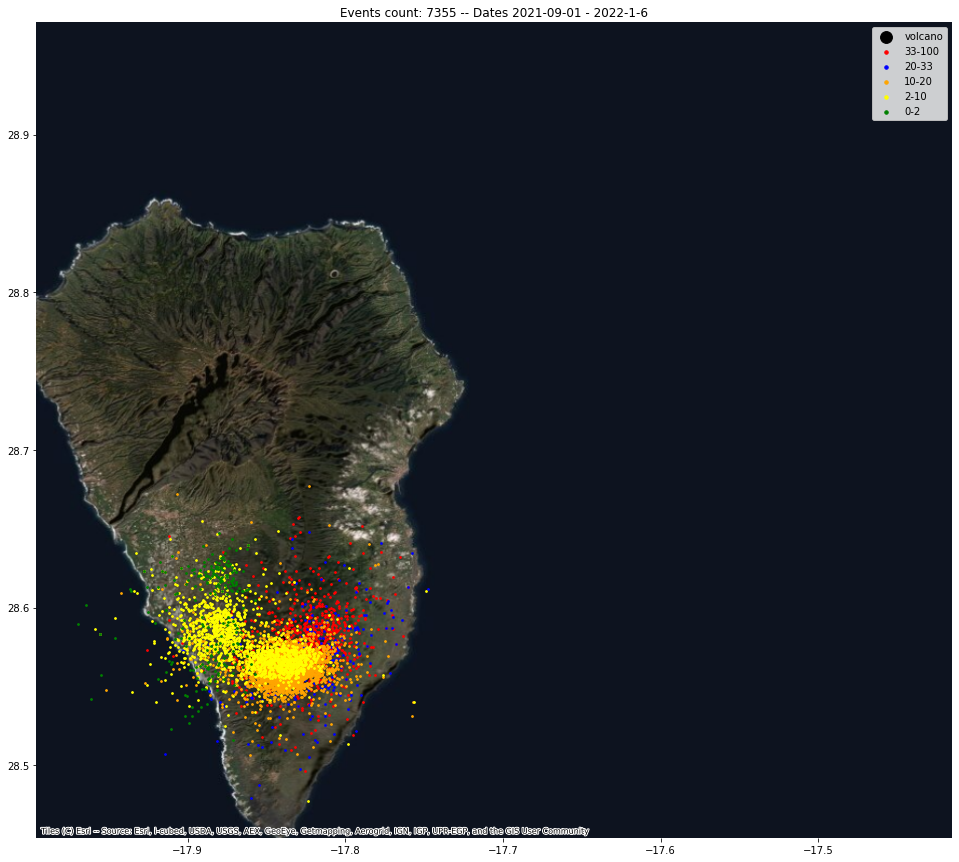

In [15]:
# Finally Plot all series after performing a CRS conversion on GeoDataFrame
# Our source GeoJSON points to a CRS84 (Web Coordinate Projection)
# We convert it to some other.
# Cam 1:La Sagrada Familia (5km) 28.6348°N 17.8894°W
# Cam 2:Roque de los Muchachos OBSY (16km) 28.7541°N 17.8892°W
# Cam 3:Puerto Tazacorte, Ocean Entry (3.7km)
# Volcano (7.9km) 28.6390°N, 17.945°W

fig = plt.figure(figsize=(23, 15))
ax = plt.subplot(111, frameon=False)

# Here we custom define a alternate Items to display on Render
df_alt = pd.DataFrame(
    {'Vents': ['Vent 1', 'Cam3', 'Cam2', 'Cam1'],
     'Name': ['Dolly', 'Cam3', 'Cam2', 'Cam1'],
     'latitud': [28.58, 28.6390, 28.7541, 28.6348],
     'longitud': [-17.84, -17.945, -17.8892, -17.8894]})
df_alt = pd.DataFrame(
    {'Vents': ['Vent 1'],
     'Name': ['Dolly'],
     'latitud': [28.58],
     'longitud': [-17.84]})
volcano = GeoDataFrame(df_alt, geometry=gpd.points_from_xy(df_alt.longitud, df_alt.latitud))
volcano = volcano.set_crs('epsg:4326') # CRS84 is EPSG:4326

def gdfplot(geoseries):
    gdf = []
    for df1 in geoseries:
        gdf1 = GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.longitud, df1.latitud))
        gdf1 = gdf1.set_crs('epsg:4326') # CRS84 is EPSG:4326
        # gdf1 = gdf1.to_crs(epsg=3857)
        gdf.append(gdf1)        

    volcano.plot( figsize=(16, 7), ax=ax, label='volcano', alpha=1.0, c='black', markersize=35)
    
    n = 0
    for geoframe in gdf:        
        color = plt.cm.Spectral(1/(1+2*np.arange(len(gdf))))
        color = ['red', 'blue','orange','yellow','green','brown','violet','white','tuscany']
        geoframe.plot( figsize=(16, 7), ax=ax, label=labels[n], color=color[n], alpha=1.0, markersize=3)
    
        n +=1

    # Here goes our added coordinates plot,
    epsg = gdf[0].crs.to_string()
    epsg = "epsg:4326"
    ctx.add_basemap(ax, crs=epsg, source=ctx.providers.Esri.WorldImagery)
    return ax

seism_params = {
    'superior': (33,100), 
    'higher': (20,33),
    'high': (10,20),
    'nominal': (2,10),
    'low': (0,2)
    }
    
geoseries, labels = RaceDataSeries(dataframe=df, params=seism_params, depth_key='profundidad').get_all()
ax0 = gdfplot(geoseries)

plt.title("Events count: %s -- Dates %s - %s" % (len(df), start_date, end_date))
plt.legend(loc="upper right", markerscale=2)
plt.show()

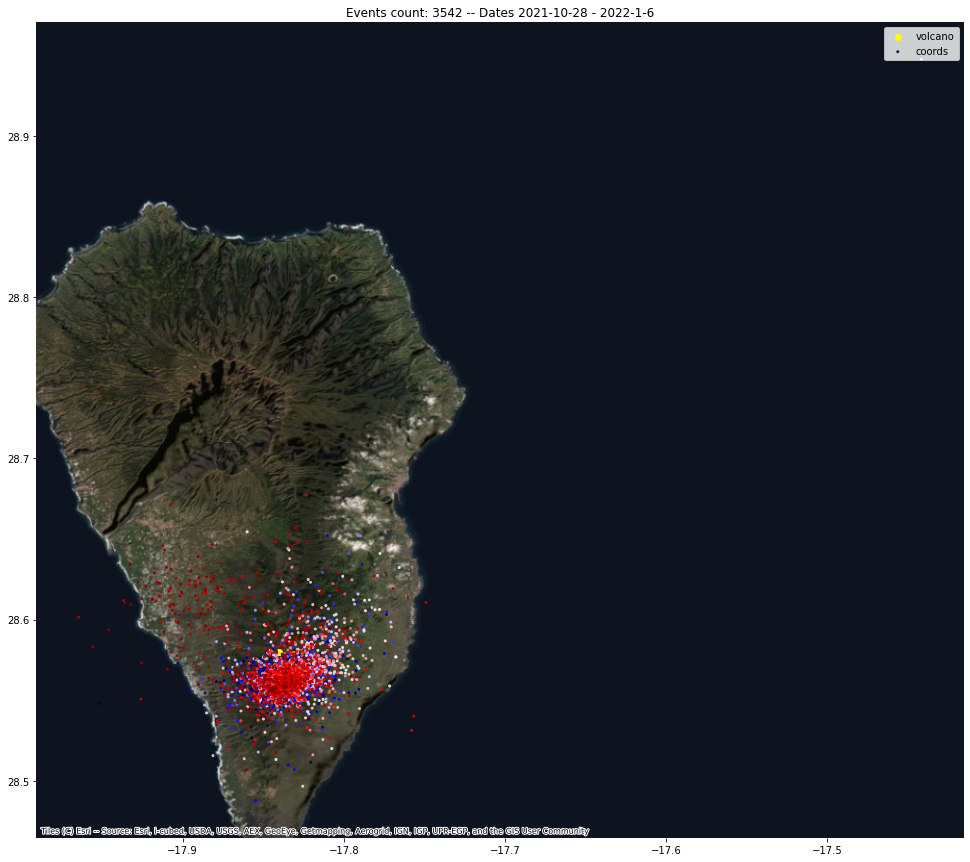

In [24]:
start_date = "2021-10-28"
end_date = todayDate2()
df2 = SeriesCutByDate(start_date, end_date, df)
# _df2 = _df2.groupby(['DateTime']).mean(['magnitud','profundidad'])
# df2 = df2.loc[ df2['profundidad'].between(0,33) ]

fig = plt.figure(figsize=(23, 15))
ax = plt.subplot(111, frameon=False)

def gdfplot(_df1):
    # _df1 = _df2.dissolve(by='profundidad', aggfunc='mean')
    gdf1 = GeoDataFrame(_df1, geometry=gpd.points_from_xy(_df1.longitud, _df1.latitud))        
    gdf1 = gdf1.set_crs('epsg:4326') # CRS84 is EPSG:4326
    volcano.plot( figsize=(16, 7), ax=ax, label='volcano', alpha=1.0, c='yellow', markersize=35)
    gdf1.plot(figsize=(16, 7), label='coords', ax=ax, alpha=.8, scheme='NaturalBreaks', cmap='seismic', c=gdf1.profundidad, markersize=4)    
    ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.Esri.WorldImagery)
    return ax

ax0 = gdfplot(df2)

plt.title("Events count: %s -- Dates %s - %s" % (len(df2), start_date, end_date))
plt.legend(loc="upper right")
plt.show()

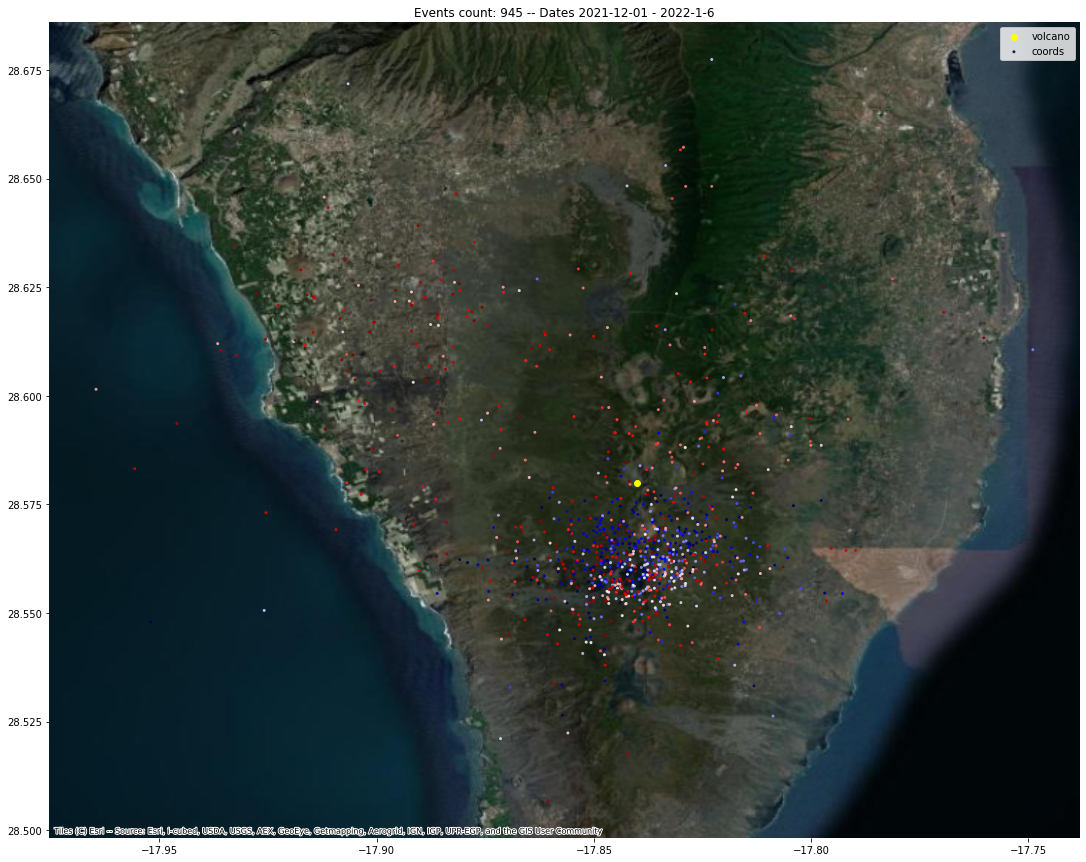

In [26]:
start_date = "2021-12-01"
end_date = todayDate2()
df2 = SeriesCutByDate(start_date, end_date, df)
# _df2 = _df2.groupby(['DateTime']).mean(['magnitud','profundidad'])
# df2 = df2.loc[ df2['profundidad'].between(0,33) ]

fig = plt.figure(figsize=(23, 15))
ax = plt.subplot(111, frameon=False)

def gdfplot(_df1):
    # _df1 = _df2.dissolve(by='profundidad', aggfunc='mean')
    gdf1 = GeoDataFrame(_df1, geometry=gpd.points_from_xy(_df1.longitud, _df1.latitud))        
    gdf1 = gdf1.set_crs('epsg:4326') # CRS84 is EPSG:4326
    volcano.plot( figsize=(16, 7), ax=ax, label='volcano', alpha=1.0, c='yellow', markersize=35)
    gdf1.plot(figsize=(16, 7), label='coords', ax=ax, alpha=.8, scheme='NaturalBreaks', cmap='seismic', c=gdf1.profundidad, markersize=4)    
    ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.Esri.WorldImagery)
    return ax

ax0 = gdfplot(df2)

plt.title("Events count: %s -- Dates %s - %s" % (len(df2), start_date, end_date))
plt.legend(loc="upper right")
plt.show()

In [27]:
# Now we're done with the basics, let's go to bed and continue later.
# Later we'll parse a series based on multiple conditions 
# And evaluate GeoDataFrame using some linear algebra,

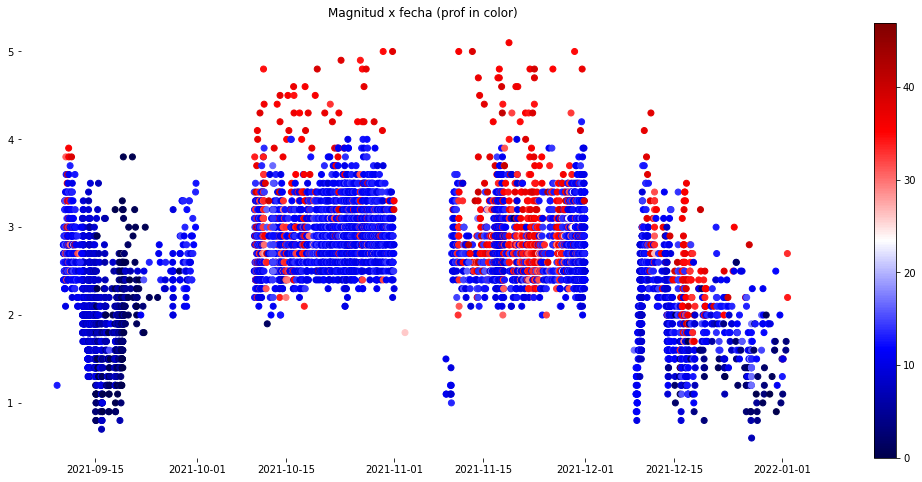

In [29]:
series = []
mag = []
maxdate = 18
def generate_series_by_date(df1):
    for sdate in range(1,maxdate):
        start_date = "2021-10-%s" % sdate
        # end_date = "2021-10-%s" % str(sdate+10)
        end_date = todayDate2()
        SeriesByDate(start_date, end_date, df1)
        y = len(df2)
        series.append(y)
        x = df2.profundidad.mean()
        mag.append(x)
        #print(df.magnitud.values)

start_date = "2017-01-01"
end_date = todayDate2()
df1 = SeriesCutByDate(start_date, end_date, df)

# generate_series_by_date(df1)
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(111, frameon=False)

mag = nan_to_num(mag, copy=True, nan=0, posinf=None, neginf=None)

color=[]
for m in mag:
    color.append(color_map_color(m))

plt.scatter(df1.Date.values, df1.magnitud.values, c=df1.profundidad, cmap='seismic')
# plt.scatter(range(1,maxdate), series, c=color,cmap=cmap)
im = plt.gca().get_children()[0]
plt.colorbar(ax=ax)
plt.title("Magnitud x fecha (prof in color)")
plt.show()
df1 = None

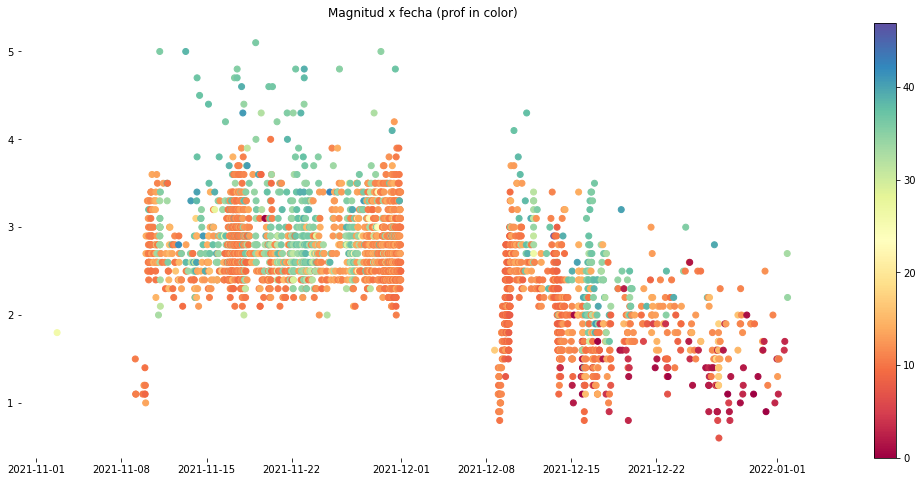

In [30]:
series = []
mag = []
maxdate = 18
def generate_series_by_date(df1):
    for sdate in range(1,maxdate):
        start_date = "2021-10-%s" % sdate
        # end_date = "2021-10-%s" % str(sdate+10)
        end_date = "2021-11-05"
        SeriesByDate(start_date, end_date, df1)
        y = len(df2)
        series.append(y)
        x = df2.profundidad.mean()
        mag.append(x)
        #print(df.magnitud.values)

start_date = "2021-11-01"
end_date = todayDate2()
df1 = SeriesCutByDate(start_date, end_date, df)
#df1.reindex(index=df1.index[::-1])

fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(111, frameon=False)

mag = nan_to_num(mag, copy=True, nan=0, posinf=None, neginf=None)

color=[]
for m in mag:
    color.append(color_map_color(m))

plt.scatter(df1.Date.values, df1.magnitud.values, c=df1.profundidad, cmap='Spectral')
#plt.scatter(df1.magnitud.values,df1.Date.values, c=df1.profundidad, cmap='Spectral')
#plt.scatter(range(1,maxdate), series, c=color,cmap='Spectral')
im = plt.gca().get_children()[0]
plt.colorbar(ax=ax)
plt.title("Magnitud x fecha (prof in color)")
plt.show()
df1 = None

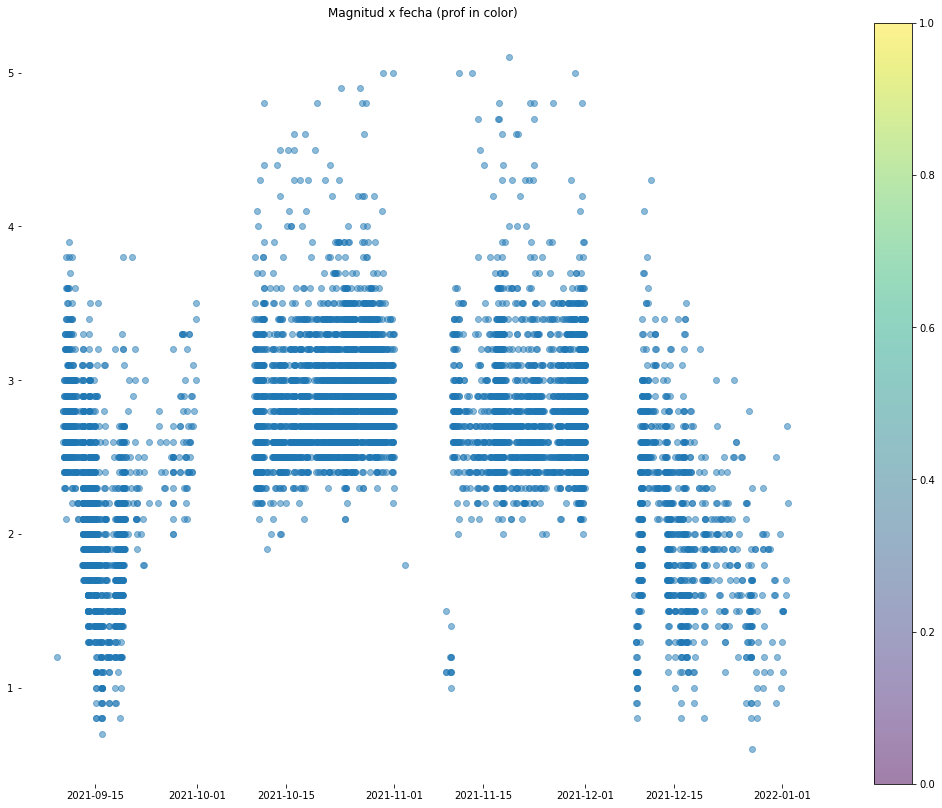

In [34]:
def MySeries():
    for x in range(20,22,2):
        start_date = "20%s-01-06" % x
        end_date = "20%s-01-06" % str(x+2)
        df1 = SeriesCutByDate(start_date, end_date, df)

        fig = plt.figure(figsize=(18, 14))
        ax = plt.subplot(111, frameon=False)

        plt.scatter(df1.Date.values, df1.magnitud.values, alpha=0.5, cmap='seismic')
        im = plt.gca().get_children()[0]
        plt.colorbar(ax=ax)
        plt.title("Magnitud x fecha (prof in color)")
        plt.show()
        df1 = None
MySeries()

In [9]:
import pandas as pd
import numpy as np 

b = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'])

# DateRanges (review)
# pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)

start_end_date = pd.Series([ np.datetime64("2021-10-14"), np.datetime64("2021-10-23") ])

_start = start_end_date[0]
_end = start_end_date[1]
pd.date_range(start=_start, end=_end, freq='1D', normalize=True)

DatetimeIndex(['2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17',
               '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
               '2021-10-22', '2021-10-23'],
              dtype='datetime64[ns]', freq='D')

In [26]:
## WORK TO EXTEND SERIES VALUE APPENDING
import mapclassify as mc

start_end = pd.Series([ np.datetime64("2021-10-14"), np.datetime64("2021-10-23") ])
df1 = SeriesCutByDate(start_end[0], start_end[1], df)
m = mc.MaximumBreaks(df1.magnitud, k=6)
p1 = mc.MaximumBreaks(df1.profundidad, k=12)

NM = pd.Series([], dtype=)

start_date = "2021-10-23"
end_date = "2021-10-31"
start_end = pd.Series([ np.datetime64(start_date), np.datetime64(end_date) ])
NM.append(start_end)

start_date = "2021-11-07"
end_date = "2021-11-17"
start_end = pd.Series([ np.datetime64(start_date), np.datetime64(end_date) ])
NM.append(start_end)

start_date = "2021-11-17"
end_date = "2021-11-28"
start_end = pd.Series([ np.datetime64(start_date), np.datetime64(end_date) ])
NM.append(start_end)

start_date = "2021-11-28"
end_date = "2021-12-12"
start_end = pd.Series([ np.datetime64(start_date), np.datetime64(end_date) ])
NM.append(start_end)

start_date = "2021-12-08"
end_date = "2021-12-22"
start_end = pd.Series([ np.datetime64(start_date), np.datetime64(end_date) ])
NM.append(start_end)

start_date = "2021-12-02"
end_date = "2021-12-28"
start_end = pd.Series([ np.datetime64(start_date), np.datetime64(end_date) ])
NM.append(start_end)

start_date = "2021-12-28"
end_date = "2022-01-06"
start_end = pd.Series([ np.datetime64(start_date), np.datetime64(end_date) ])
NM.append(start_end)

for x in NM.iteritems():
    print(x[0], x[1])

df1 = SeriesCutByDate(start_date, end_date, df)
p1 = mc.MaximumBreaks(df1.profundidad, k=24)
# print(p1)

Insufficient number of unique diffs. Breaks are random.


C:\Users\Diego2\AppData\Local\Temp/ipykernel_7240/1388949564.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  NM = pd.Series()


In [41]:
p1 = p8
#print(m)
print(p1)
#print(p1.get_tss())
#print(p1.get_adcm())
#print(p1.get_gadf())
print(p1.get_legend_classes())
print(p1.counts)
#print(p1.get_fmt())
#print(p1.bins)
#print(p1.y)
#print(p1.yb)
#print(p1.table())

MaximumBreaks         

   Interval      Count
----------------------
[ 0.00,  0.50] |     2
( 0.50,  1.00] |     3
( 1.00,  1.00] |     0
( 1.00,  1.50] |     0
( 1.50,  2.00] |     5
( 2.00,  2.00] |     0
( 2.00,  2.00] |     0
( 2.00,  2.00] |     0
( 2.00,  2.50] |     0
( 2.50,  3.00] |     6
( 3.00,  3.00] |     0
( 3.00,  3.00] |     0
( 3.00,  3.00] |     0
( 3.00,  3.50] |     0
( 3.50,  7.00] |     2
( 7.00, 10.50] |     3
(10.50, 11.50] |     5
(11.50, 12.50] |     5
(12.50, 13.50] |     1
(13.50, 14.50] |     1
(14.50, 15.50] |     1
(15.50, 24.50] |     2
(24.50, 33.50] |     2
(33.50, 34.00] |     1
['[ 0.00,  0.50]', '( 0.50,  1.00]', '( 1.00,  1.00]', '( 1.00,  1.50]', '( 1.50,  2.00]', '( 2.00,  2.00]', '( 2.00,  2.00]', '( 2.00,  2.00]', '( 2.00,  2.50]', '( 2.50,  3.00]', '( 3.00,  3.00]', '( 3.00,  3.00]', '( 3.00,  3.00]', '( 3.00,  3.50]', '( 3.50,  7.00]', '( 7.00, 10.50]', '(10.50, 11.50]', '(11.50, 12.50]', '(12.50, 13.50]', '(13.50, 14.50]', '(14.50, 15.50]',

dict_keys(['name', 'default', 'IGN', 'profile1', 'profile2'])


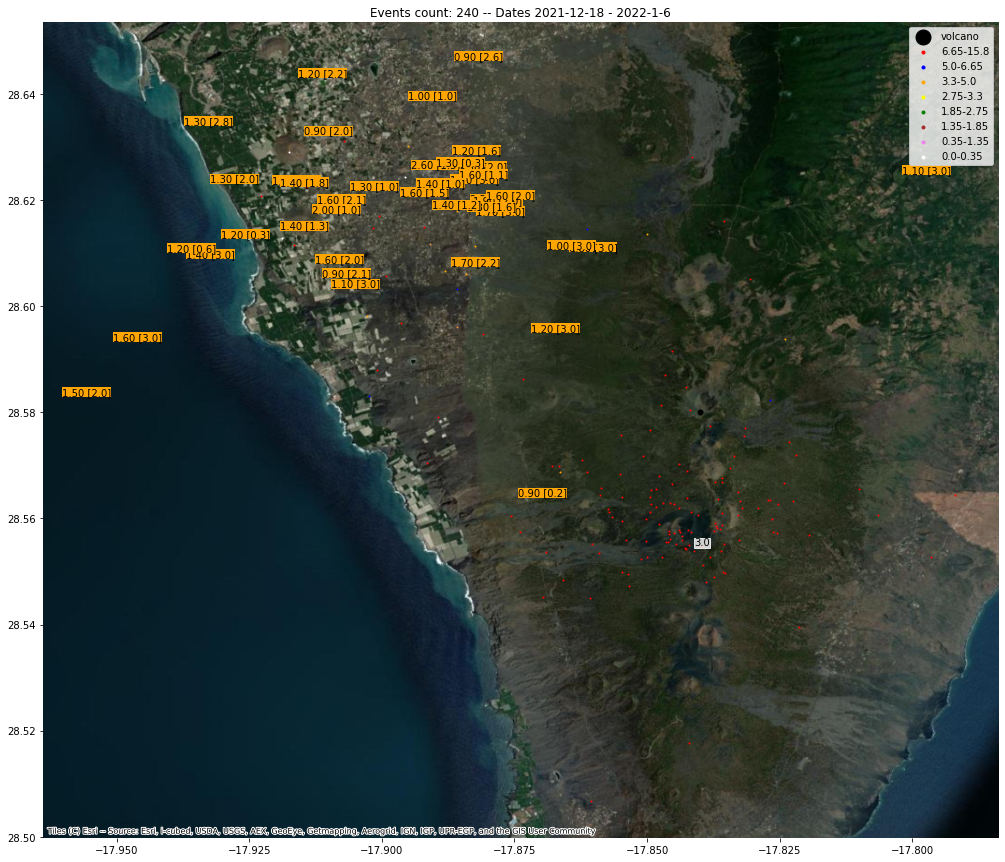

In [39]:
fig = plt.figure(figsize=(23, 15))
ax = plt.subplot(111, frameon=False)

def gdfplot(geoseries):
    gdf = []
    for _df1 in geoseries:
        gdf1 = GeoDataFrame(_df1, geometry=gpd.points_from_xy(_df1.longitud, _df1.latitud))
        gdf1 = gdf1.set_crs('epsg:4326') # CRS84 is EPSG:4326
        # gdf1 = gdf1.to_crs(epsg=3857)
        gdf.append(gdf1)        
    volcano.plot( figsize=(16, 7), ax=ax, label='volcano', alpha=1.0, c='black', markersize=25)   
    n = 0
    for geoframe in gdf:        
        #color = plt.cm.Spectral(1/(1+2*np.arange(len(gdf))))
        color = ['red', 'blue','orange','yellow','green','brown','violet','white','tuscany']
        viridis = cm.get_cmap('seismic', 12)        
        geoframe.plot( figsize=(16, 7), ax=ax, label=labels[n], color=color[n], alpha=1.0, markersize=1)
        n +=1
            
        X = geoframe.loc[ geoframe['profundidad'].between(.1,3.0) ]
        for idx, row in X.iterrows():
            mag = row['magnitud']
            prof = row['profundidad']
            label = "{:.2f} [{:.1f}]".format(mag,prof)
            xy = row['geometry']
            ax.annotate(text=label, xy=(xy.x, xy.y), ha='center', bbox={'facecolor': 'orange', 'alpha':1.0, 'pad': 0, 'edgecolor':'none'})

        X = geoframe.loc[ geoframe['magnitud'].between(2.95,3.8) ]
        for idx, row in X.iterrows():
            mag = row['magnitud']
            label = "{:.1f}".format(mag)
            xy = row['geometry']
            ax.annotate(text=label, xy=(xy.x, xy.y), ha='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 0, 'edgecolor':'white'})
            
        X = geoframe.loc[ geoframe['magnitud'].between(3.4,5.5) ]
        for idx, row in X.iterrows():
            mag = row['magnitud']
            label = "{:.1f}".format(mag)
            xy = row['geometry']
            ax.annotate(text=label, xy=(xy.x, xy.y), ha='center', bbox={'facecolor': 'yellow', 'alpha':0.8, 'pad': 0, 'edgecolor':'none'})
            
    #    for x,y in zip(X.longitud,X.latitud):
    #        label = "{:.2f}".format(y)

    # Here goes our added coordinates plot,
    #label = gdf[0].crs.to_string()
    label = "epsg:4326"
    ctx.add_basemap(ax, crs=label, source=ctx.providers.Esri.WorldImagery)            
    return ax

data = readconf("config.toml")
# Drop some Rows based on Bounding box condition
df2 = df.drop(df[df.latitud > data['profile2']['minlat']].index)
df2 = df.drop(df[df.latitud < data['profile2']['maxlat']].index)
df2 = df.drop(df[df.longitud < data['profile2']['minlon']].index)
df2 = df.drop(df[df.longitud > data['profile2']['maxlon']].index)

start_date = "2021-12-18"
end_date = todayDate2()
df1 = SeriesCutByDate(start_date, end_date, df2)

seism_params = {
    'superior': ( 6.65, 15.80), 
    'higher': ( 5.00,  6.65),
    'high': ( 3.30,  5.00),
    'nominal': ( 2.75,  3.30),
    'low': ( 1.85,  2.75),
    'midlow': ( 1.35,  1.85),
    'verylow': ( 0.35,  1.35),
    'surface': ( 0.00,  0.35)
    }
 
geoseries, labels = RaceDataSeries(dataframe=df1, params=seism_params, depth_key='profundidad').get_all()
ax0 = gdfplot(geoseries)

plt.title("Events count: %s -- Dates %s - %s" % (len(df1), start_date, end_date))
plt.legend(loc="upper right", markerscale=3)
plt.show()
# q_none = gdf.loc[ df['magnitud'].between(1.8,2.4) ]

In [ ]:
# tripled (past week vs this)
( 9.05, 15.65] |   209
+ ( 8.80, 15.45] |   587

# nearly tripled
(29.15, 31.60] |     7
+ (30.45, 31.50] |    18

# from n to 1 (past week)
(32.20, 33.00] |     7
(33.00, 33.85] |    14
(33.85, 34.80] |    12
(34.80, 35.50] |    11

# from 2 to n (this week). 
+ (38.00, 40.20] |   363

In [ ]:
df_orig = df.copy()
df_orig = df.loc[ df['profundidad'].between(0,33) ]
df_orig = df.loc[ df['magnitud'].between(2,6) ]
MySeries()

In [ ]:
pd.Series(['3/11/2000', '3/12/2000', '3/13/2000']*10000)